In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
cd MyDrive/final dataset2

/gdrive/MyDrive/final dataset2


In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

np.random.seed(100)
python_random.seed(100)
tf.random.set_seed(100)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.regularizers import l2

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
Y_train = train[['abnormal','normal']]
X_train = train.drop(labels = ['abnormal','normal'],axis = 1)
Y_test = test[['abnormal','normal']]
X_test = test.drop(labels = ['abnormal','normal'],axis = 1)

In [ ]:
X_test.drop('Unnamed: 0', inplace=True, axis=1)
X_train.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_test= mm.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train= mm.fit_transform(X_train)
X_train = pd.DataFrame(X_train)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=4)

In [ ]:
# Used Sequential
model=tf.keras.Sequential()
model.add(tf.keras.Input(
    shape=(15000,1),
    batch_size=None))
model.add(tf.keras.layers.Conv1D(8, (23), strides=3, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.MaxPooling1D(2,strides=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(64, (13), strides=1, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2,strides=2))
model.add(tf.keras.layers.Conv1D(128, (3), strides=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(32, (7), strides=1, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2,strides=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(128, (11), strides=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(64, (5), strides=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(64, (9), strides=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(48, (15), strides=1, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.MaxPooling1D(2,strides=2))
model.add(tf.keras.layers.Conv1D(32, (3), strides=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(16, (3), strides=1, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2,strides=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4993, 8)           192       
                                                                 
 dropout (Dropout)           (None, 4993, 8)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2496, 8)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 2496, 8)          32        
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 2484, 64)          6720      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1242, 64)         0

In [ ]:
optimizer = tf.keras.optimizers.Adam( learning_rate=0.00001,beta_1=0.9,beta_2=0.999,decay=1e-3)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 150, validation_data= (X_val, Y_val),batch_size=128)
#score, acc = model.evaluate(X_val, Y_val)

Epoch 1/150
17/17 [==============================] - 7s 176ms/step - loss: 0.7957 - accuracy: 0.5209 - val_loss: 0.6927 - val_accuracy: 0.5790
Epoch 2/150
17/17 [==============================] - 2s 102ms/step - loss: 0.7704 - accuracy: 0.5177 - val_loss: 0.6926 - val_accuracy: 0.5110
Epoch 3/150
17/17 [==============================] - 2s 101ms/step - loss: 0.7615 - accuracy: 0.5223 - val_loss: 0.6925 - val_accuracy: 0.5074
Epoch 4/150
17/17 [==============================] - 2s 101ms/step - loss: 0.7535 - accuracy: 0.5251 - val_loss: 0.6924 - val_accuracy: 0.5165
Epoch 5/150
17/17 [==============================] - 2s 101ms/step - loss: 0.7332 - accuracy: 0.5338 - val_loss: 0.6923 - val_accuracy: 0.5147
Epoch 6/150
17/17 [==============================] - 2s 102ms/step - loss: 0.7277 - accuracy: 0.5297 - val_loss: 0.6922 - val_accuracy: 0.5110
Epoch 7/150
17/17 [==============================] - 2s 103ms/step - loss: 0.7169 - accuracy: 0.5444 - val_loss: 0.6921 - val_accuracy: 0.5110

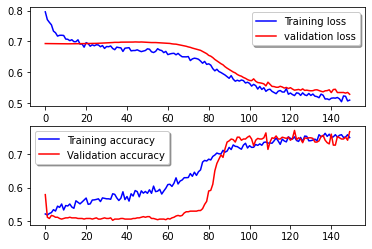

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 73.913%


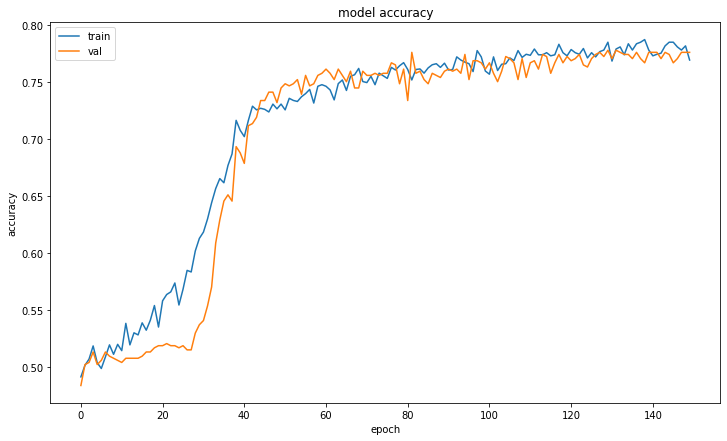

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

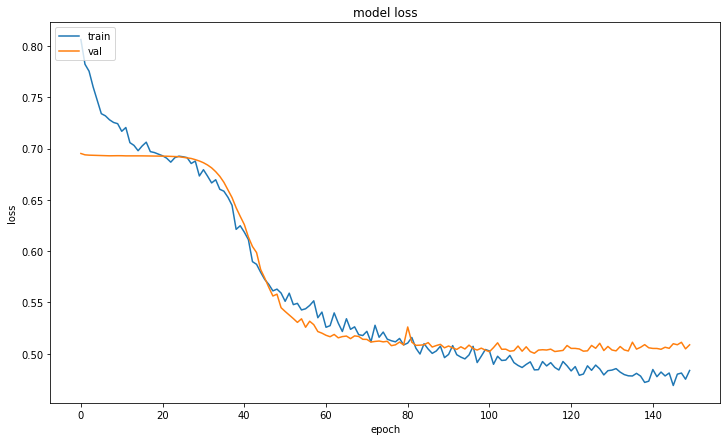

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
#Y_pred=np.argmax(Y_pred, axis=1)
Y_pred = pd.DataFrame(Y_pred)
Y_pred

,0,1
0,0.285753,0.714247
1,0.143420,0.856580
2,0.203917,0.796083
3,0.171593,0.828407
4,0.096867,0.903133
...,...,...
271,0.535417,0.464583
272,0.645713,0.354287
273,0.944502,0.055498
274,0.899614,0.100386


In [ ]:
Y_pred.loc[0].iat[0]=1

In [ ]:
len(Y_pred)

276

In [ ]:
for i in range(len(Y_pred)):

  if Y_pred.loc[i].iat[0] > 0.5:
    Y_pred.loc[i].iat[0] = 1
    Y_pred.loc[i].iat[1] = 0
  else:
    Y_pred.loc[i].iat[0] = 0
    Y_pred.loc[i].iat[1] = 1



In [ ]:
Y_pred

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
271,1.0,0.0
272,1.0,0.0
273,1.0,0.0
274,1.0,0.0


In [ ]:
Y_test

,abnormal,normal
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
271,1,0
272,1,0
273,1,0
274,1,0


In [ ]:
Y_test = np.array(Y_test)
Y_pred = np.array(Y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)).ravel()

In [ ]:
cm = np.matrix([[tp, fn], [fp, tn]])
cm = np.array(cm)

In [ ]:
cm = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))


In [ ]:
print(cm)

[[101  25]
 [ 48 102]]


In [ ]:
#recall
recall = (tp/(tp+fn))*100
print(recall)

68.0


In [ ]:
#precision
p = (tp/(tp+fp))*100
print(p)

80.31496062992126


In [ ]:
#f1
f = (recall*p*2/(recall+p))
print(f)

73.6462093862816
